In [151]:
import numpy as np
import scipy.io as sio
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
def load_data(path):
    data = sio.loadmat(path)
    return map(np.ravel, [data['X'], data['y'], data['Xval'], data['yval'], data['Xtest'], data['ytest']])

In [153]:
x, y, xval, yval, xtest, ytest = load_data('D:\机器学习——Andrew_rag\code\ex5-bias vs variance\ex5data1.mat')

* seaborn画图：https://www.jb51.net/article/238735.htm

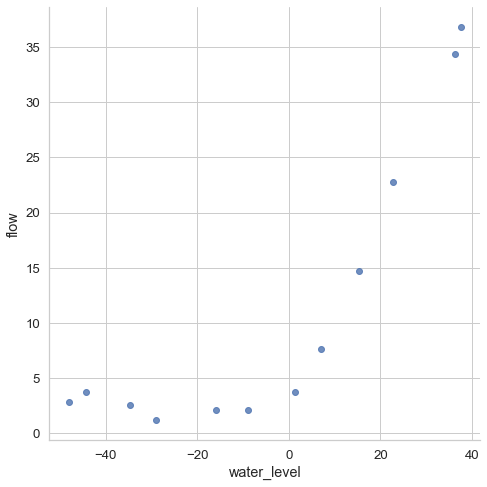

In [154]:
df = pd.DataFrame({'water_level': x, 'flow':y})
sns.set(style="whitegrid", font_scale=1.2) #画网格
sns.lmplot(x='water_level', y='flow', data=df, fit_reg=False, height=7)
plt.show()

In [155]:
x, xval, xtest = [np.insert(x.reshape(x.shape[0],1), 0, np.ones(x.shape[0]), axis=1) for x in (x, xval, xtest)]

# 代价函数

In [156]:
def cost(theta, x, y):
    m = x.shape[0]
    inner = x @ theta - y #线性模型，不用sigmoid(非线性才用)
    square_sum = inner.T @ inner #向量化编写避免循环？
    cost = square_sum / (2 * m)

    return cost

In [157]:
theta = np.ones(x.shape[1])#要求:theta initialized at[1；1]
cost(theta, x, y)

303.9515255535976

In [158]:
def gradient(theta, x, y):
    m = x.shape[0]

    inner = x.T @ (x @ theta - y)

    return inner / m

In [159]:
gradient(theta, x, y)

array([-15.30301567, 598.16741084])

# 正则化梯度

In [160]:
def regularized_gradient(theta, x, y, l=1):
    m = x.shape[0]
    regularized_term = theta.copy()
    regularized_term[0] = 0 #确保theta0不正则化

    regularized_term = (l / m) * regularized_term

    return regularized_term + gradient(theta, x, y)

In [161]:
regularized_gradient(theta, x, y)

array([-15.30301567, 598.25074417])

In [162]:
def regularized_cost(theta, x, y, l=1):
    m = x.shape[0]
    regularized_term = (l / (2 * m)) * np.power(theta[1:],2).sum()

    return regularized_term + cost(theta, x, y)

* fun：该参数就是costFunction你要去最小化的损失函数，将costFunction的名字传给fun  
官方给的提示：  
The objective function to be minimized.  
fun(x, *args) -> float  
where x is an 1-D array with shape (n,) and args  
is a tuple of the fixed parameters needed to completely  
specify the function.  
意思就是损失函数在定义时，**theta必须为第一个参数且其shape必须为(n,)**即一维数组。在计算损失函数的时候用到的其他参数以元组的形式传入到args参数中（其他参数具体指X，Y，lambda等），最后返回损失的值，可以为数组形式，也可以为一个实数.  
参数x0就是初始化的theta,其shape必须为shape(n,)即一维数组.  
* method：该参数代表采用的方式，默认是BFGS, L-BFGS-B, SLSQP中的一种，可选TNC  
* jac：该参数就是计算梯度的函数，和fun参数类似，第一个必须为theta且其shape必须为(n,)即一维数组,最后返回的梯度也必须为一个一维数组。  
* options：用来控制最大的迭代次数，以字典的形式来进行设置，例如：options={‘maxiter’:400}  

In [163]:
def linear_regression_np(x, y, l=1):
    theta = np.ones(x.shape[1]) #初始化参数
    res = opt.minimize(fun=regularized_cost,
                       x0=theta,
                       args=(x, y, l),
                       method='TNC',
                       jac=regularized_gradient,
                       options={'disp':True}) #优化梯度下降
    
    return res

In [164]:
theta = np.ones(x.shape[0])
final_theta = linear_regression_np(x, y, l=0).get('x')

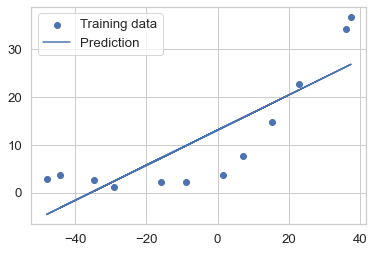

In [165]:
b = final_theta[0]
m = final_theta[1]

plt.scatter(x[:, 1], y, label="Training data")
plt.plot(x[:, 1], x[:, 1] * m + b, label="Prediction")
plt.legend(loc=2)
plt.show()

In [166]:
training_cost, cv_cost = [], []

1.使用训练集的子集来拟合应模型  

2.在计算训练代价和交叉验证代价时，没有用正则化  

3.记住使用相同的训练集子集来计算训练代价  

In [167]:
m = x.shape[0]
for i in range(1, m+1):
    res = linear_regression_np(x[:i, :], y[:i], l=0)

    tc = regularized_cost(res.x, x[:i, :], y[:i], l=0)
    cv = regularized_cost(res.x, xval, yval, l=0)

    training_cost.append(tc)
    cv_cost.append(cv)

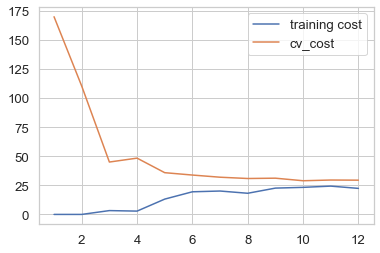

In [168]:
plt.plot(np.arange(1, m+1), training_cost, label='training cost')
plt.plot(np.arange(1, m+1), cv_cost, label='cv_cost')
plt.legend(loc=1)
plt.show()

模型**欠拟合**

# 多项式回归

In [169]:
def prepare_poly_data(*args, power):
    def prepare(x):
        df = poly_features(x, power=power)
        ndarr = nomalize_feature(df).values#转换成数组形式

        return np.insert(ndarr, 0, np.ones(ndarr.shape[0]), axis=1)
    
    return [prepare(x) for x in args]

In [170]:
def poly_features(x, power, as_ndarr=False):
    data = {'f{}'.format(i): np.power(x, i) for i in range(1, power + 1)}
    df = pd.DataFrame(data)

    return df.values if as_ndarr else df

In [171]:
def nomalize_feature(df):
    return df.apply(lambda column: (column - column.mean()) / column.std())

In [172]:
x, y, xval, yval, xtest, ytest = load_data('D:\机器学习——Andrew_rag\code\ex5-bias vs variance\ex5data1.mat')
#为什么一定要有这个？前面insert过数据，并不是原始数据

In [173]:
poly_features(x, power=3)

,f1,f2,f3
0,-15.936758,253.980260,-4047.621971
1,-29.152979,849.896197,-24777.006175
2,36.189549,1309.683430,47396.852168
3,37.492187,1405.664111,52701.422173
4,-48.058829,2309.651088,-110999.127750
5,-8.941458,79.949670,-714.866612
6,15.307793,234.328523,3587.052500
7,-34.706266,1204.524887,-41804.560890
8,1.389154,1.929750,2.680720
9,-44.383760,1969.918139,-87432.373590


In [174]:
x_poly, xval_poly, xtest_poly = prepare_poly_data(x, xval, xtest, power=8)
x_poly[:3, :]

array([[ 1.00000000e+00, -3.62140776e-01, -7.55086688e-01,
         1.82225876e-01, -7.06189908e-01,  3.06617917e-01,
        -5.90877673e-01,  3.44515797e-01, -5.08481165e-01],
       [ 1.00000000e+00, -8.03204845e-01,  1.25825266e-03,
        -2.47936991e-01, -3.27023420e-01,  9.33963187e-02,
        -4.35817606e-01,  2.55416116e-01, -4.48912493e-01],
       [ 1.00000000e+00,  1.37746700e+00,  5.84826715e-01,
         1.24976856e+00,  2.45311974e-01,  9.78359696e-01,
        -1.21556976e-02,  7.56568484e-01, -1.70352114e-01]])

# 画学习曲线

> 首先，我们没有使用正则化，所以 $\lambda=0$

In [175]:
def plot_learning_curve(x, y, xval, yval,l=0):
    training_cost, cv_cost = [], []
    m = x.shape[0]

    for i in range(1, m+1):
        res = linear_regression_np(x[:i, :], y[:i], l)

        tc = cost(res.x, x[:i, :], y[:i])
        cv = cost(res.x, xval, yval)

        training_cost.append(tc)
        cv_cost.append(cv)
    
    plt.plot(np.arange(1, m+1), training_cost, label='training cost')
    plt.plot(np.arange(1, m+1), cv_cost, label='cv_cost')
    plt.legend(loc=1)

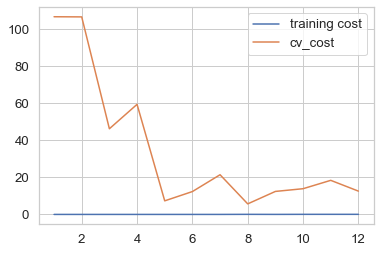

In [176]:
plot_learning_curve(x_poly, y, xval_poly, yval,l=0)
plt.show()

训练代价太低，不真实，过拟合

> 再使用正则化， $\lambda=1$

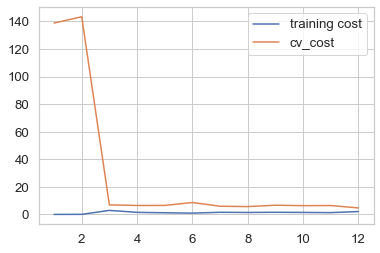

In [177]:
plot_learning_curve(x_poly, y, xval_poly, yval, l=1)
plt.show()

训练代价增加了，从140开始，减轻了过拟合

> 加大正则化， $\lambda=100$

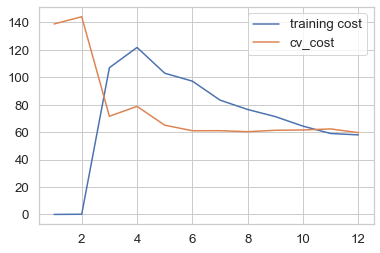

In [178]:
plot_learning_curve(x_poly, y, xval_poly, yval, l=100)
plt.show()

100太多了，变成欠拟合了

# 寻找最佳的$\lambda$

In [179]:
l_candidate = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
training_cost, cv_cost = [], []

In [180]:
for l in l_candidate:
    res = linear_regression_np(x_poly, y, l)
    tc = cost(res.x, x_poly, y)
    cv = cost(res.x, xval_poly, yval)

    training_cost.append(tc)
    cv_cost.append(cv)

Text(0, 0.5, 'cost')

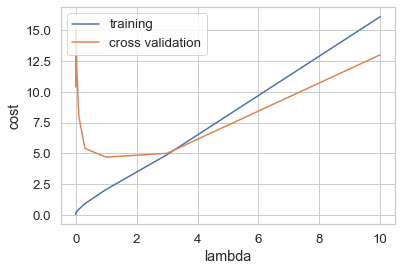

In [181]:
plt.plot(l_candidate, training_cost, label='training')
plt.plot(l_candidate, cv_cost, label='cross validation')
plt.legend(loc=2)

plt.xlabel('lambda')
plt.ylabel('cost')

In [182]:
l_candidate[np.argmin(cv_cost)]

for l in l_candidate:
    theta = linear_regression_np(x_poly, y, l).x
    print('test cost(l={}) = {}'.format(l, cost(theta, xtest_poly, ytest)))

test cost(l=0) = 9.94869701563562
test cost(l=0.001) = 11.035879865655517
test cost(l=0.003) = 11.271646800642243
test cost(l=0.01) = 10.881265017157716
test cost(l=0.03) = 10.02160522050444
test cost(l=0.1) = 8.632019709317056
test cost(l=0.3) = 7.336713093161241
test cost(l=1) = 7.466307524774576
test cost(l=3) = 11.643932722550213
test cost(l=10) = 27.715080256537878


$\lambda = 0.3$ 最好？